## Nobel Prizes by Category

In [1]:
from google.colab import files
uploaded = files.upload()

Saving SDnobel.csv to SDnobel.csv


**Import Libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv("SDnobel.csv")
df.head()

,Unnamed: 0,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,...,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female,age,age_group
0,0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,...,Berlin,Germany,1911-03-01,Berlin,Germany,False,1900,False,49.0,Adult
1,1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,...,NaN,NaN,1907-09-07,Châtenay,France,False,1900,False,62.0,Adult
2,2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,...,Marburg,Germany,1917-03-31,Marburg,Germany,False,1900,False,47.0,Adult
3,3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,...,NaN,NaN,1910-10-30,Heiden,Switzerland,False,1900,False,73.0,Senior
4,4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,...,NaN,NaN,1912-06-12,Paris,France,False,1900,False,79.0,Senior


**Dataset**  **Overview**


In [20]:
print("Original shape:", df.shape) #dataset shape
df.info() #data types & non-null values
print(df.describe())# statistical summary

Original shape: (911, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            911 non-null    int64  
 1   year                  911 non-null    int64  
 2   category              911 non-null    object 
 3   prize                 911 non-null    object 
 4   motivation            823 non-null    object 
 5   prize_share           911 non-null    object 
 6   laureate_id           911 non-null    int64  
 7   laureate_type         911 non-null    object 
 8   full_name             911 non-null    object 
 9   birth_date            883 non-null    object 
 10  birth_city            883 non-null    object 
 11  birth_country         885 non-null    object 
 12  sex                   885 non-null    object 
 13  organization_name     665 non-null    object 
 14  organization_city     667 non-null    object 
 1

**Missing Values Analysis**

In [9]:
missing_percentage = (df.isna().sum() / len(df)) * 100
missing_percentage[missing_percentage > 0]

,0
motivation,9.659715
birth_date,3.073546
birth_city,3.073546
birth_country,2.854007
sex,2.854007
organization_name,27.003293
organization_city,26.783754
organization_country,26.783754
death_date,34.906696
death_city,36.772777


**percentage of missing values**

In [14]:
missing_percentage = (df.isna().sum() / len(df))*100
print(missing_percentage[missing_percentage >0])

motivation               9.659715
birth_date               3.073546
birth_city               3.073546
birth_country            2.854007
sex                      2.854007
organization_name       27.003293
organization_city       26.783754
organization_country    26.783754
death_date              34.906696
death_city              36.772777
death_country           36.114160
age                      3.073546
dtype: float64


**Column types summary & select relevant columns**

In [5]:
print(df.dtypes.value_counts())
columns_needed=[
    'year',
    'category',
    'motivation',
    'full_name',
    'birth_date',
    'birth_country',
    'sex',
    'decade',
    'age_group'
]
df = df[columns_needed]
print("Shape after selecting columns: ", df.shape)




object    7
int64     2
Name: count, dtype: int64
Shape after selecting columns:  (911, 9)


**Handle missing values**

In [7]:
df['birth_country'] = df['birth_country'].fillna('Unknown')
df['sex'] = df['sex'].fillna('Unknown')
df['motivation'] = df['motivation'].fillna('Not specified')

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           911 non-null    int64 
 1   category       911 non-null    object
 2   motivation     911 non-null    object
 3   full_name      911 non-null    object
 4   birth_date     883 non-null    object
 5   birth_country  911 non-null    object
 6   sex            911 non-null    object
 7   decade         911 non-null    int64 
 8   age_group      911 non-null    object
dtypes: int64(2), object(7)
memory usage: 64.2+ KB


**Nobel Prizes by Category**

category
Medicine      211
Physics       204
Chemistry     175
Peace         130
Literature    113
Economics      78
Name: count, dtype: int64


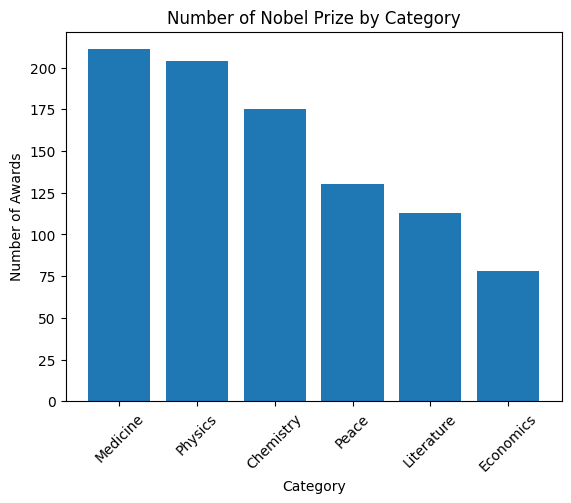

In [8]:
category_value=df.category.value_counts()
print(category_value)

plt.bar(category_value.index, category_value.values)
plt.title("Number of Nobel Prize by Category")
plt.xlabel("Category")
plt.ylabel("Number of Awards")
plt.xticks(rotation=45)
plt.show()

**Gender Distribution Over Decades**

sex     Female   Male  Unknown
decade                        
1900       3.0   53.0      1.0
1910       1.0   37.0      2.0
1920       2.0   52.0      NaN
1930       3.0   52.0      1.0
1940       3.0   37.0      3.0
1950       NaN   71.0      1.0
1960       3.0   72.0      4.0
1970       4.0   99.0      1.0
1980       4.0   90.0      3.0
1990       7.0   94.0      3.0
2000      11.0  108.0      4.0
2010       8.0   71.0      3.0


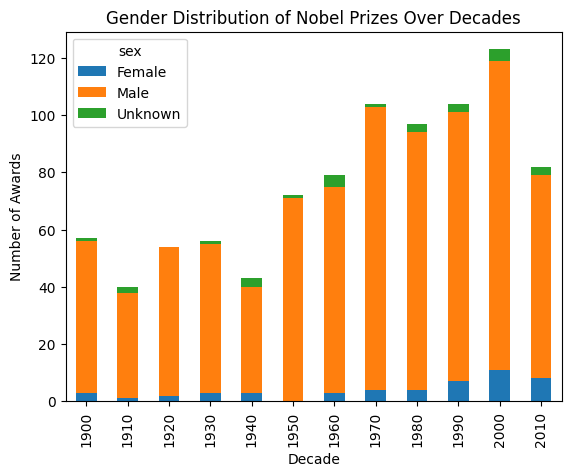

In [9]:
gender_decade = df.groupby(['decade', 'sex']).size().unstack()
print(gender_decade)

gender_decade.plot(kind='bar', stacked=True)
plt.title("Gender Distribution of Nobel Prizes Over Decades")
plt.xlabel("Decade")
plt.ylabel("Number of Awards")
plt.show()

**Female X category**

In [10]:
female_df = df[df['sex']=='Female']
female_by_category = female_df['category'].value_counts()
print(female_by_category)

category
Peace         16
Literature    14
Medicine      12
Chemistry      4
Physics        2
Economics      1
Name: count, dtype: int64


Nobal Prizes by Gender

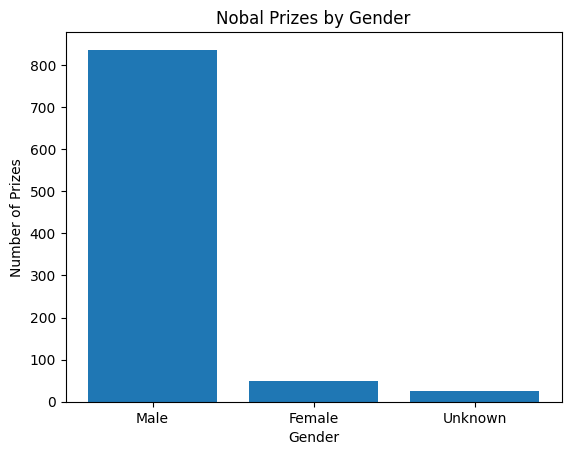

In [11]:
gender_counts = df['sex'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.title("Nobal Prizes by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Prizes")
plt.show()

** Has Female Participation Increased Over Time?**

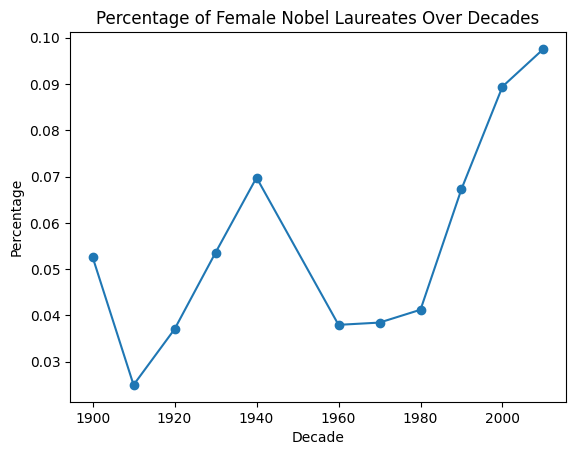

In [12]:
gender_ratio = (
    df.groupby(['decade', 'sex'])
    .size()
    .reset_index(name='count')
)

gender_ratio['ratio'] = (
    gender_ratio['count'] /
    gender_ratio.groupby('decade')['count'].transform('sum')
)

female_ratio = gender_ratio[gender_ratio['sex'] == 'Female']

plt.plot(female_ratio['decade'], female_ratio['ratio'], marker='o')
plt.title("Percentage of Female Nobel Laureates Over Decades")
plt.xlabel("Decade")
plt.ylabel("Percentage")
plt.show()

**First Female Nobel Laureate in Each Category**

In [13]:
female_firsts = (
    df[df['sex'] == 'Female']
    .groupby('category')['year']
    .min()
    .sort_values()
)

female_firsts

,year
category,
Physics,1903
Peace,1905
Literature,1909
Chemistry,1911
Medicine,1947
Economics,2009


Female Nobel Laureates Over Decades

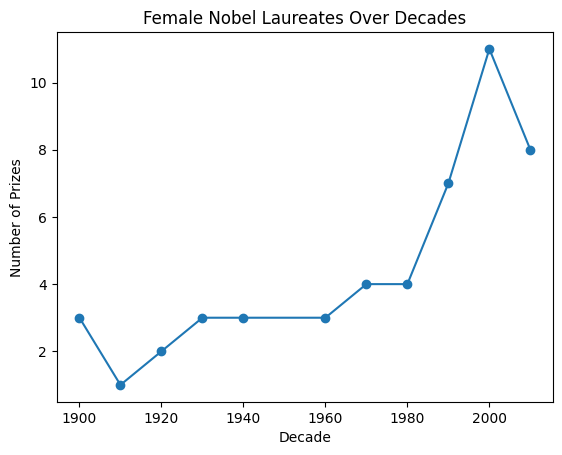

In [17]:
gender_decade_long = (
    df.groupby(['decade', 'sex'])
    .size()
    .reset_index(name='count')
)
female_decade = gender_decade_long[gender_decade_long['sex']=='Female']
female_decade = female_decade.sort_values('decade')
plt.plot(female_decade['decade'], female_decade['count'], marker='o')
plt.title("Female Nobel Laureates Over Decades")
plt.xlabel("Decade")
plt.ylabel("Number of Prizes")
plt.show()

Female Nobel Laureates by Category

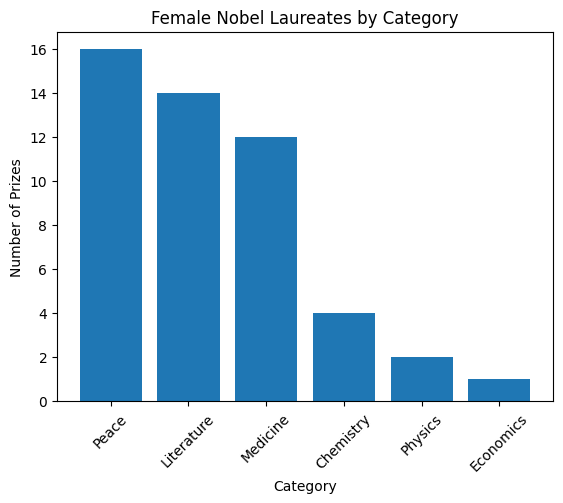

In [30]:
plt.bar(female_by_category.index, female_by_category.values)
plt.title("Female Nobel Laureates by Category")
plt.xlabel("Category")
plt.ylabel("Number of Prizes")
plt.xticks(rotation=45)
plt.show()


first female vs first male per category

            First Male  First Female
category                            
Chemistry         1901          1911
Economics         1969          2009
Literature        1901          1909
Medicine          1901          1947
Peace             1901          1905
Physics           1901          1903


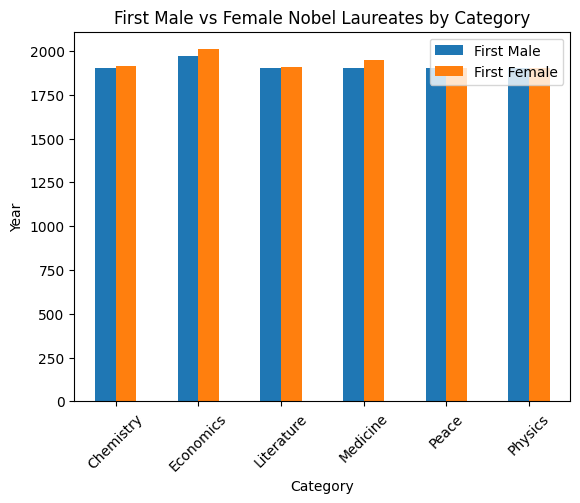

            First Male  First Female  Gap (Years)
category                                         
Medicine          1901          1947           46
Economics         1969          2009           40
Chemistry         1901          1911           10
Literature        1901          1909            8
Peace             1901          1905            4
Physics           1901          1903            2


In [31]:
male_firsts=(
    df[df['sex']=='Male']
    .groupby('category')['year']
    .min()
)

first_gender_comparison=pd.DataFrame({
   'First Male' : male_firsts,
   'First Female': female_firsts
})
print(first_gender_comparison)

first_gender_comparison.plot(kind='bar')
plt.title("First Male vs Female Nobel Laureates by Category")
plt.xlabel("Category")
plt.ylabel("Year")
plt.xticks(rotation=45)
plt.show()

first_gender_comparison['Gap (Years)']=(
    first_gender_comparison['First Female']-
    first_gender_comparison['First Male']
)
print(first_gender_comparison.sort_values('Gap (Years)', ascending=False))

Conclusion

- Male dominance is evident across most decades.
- Female participation has increased, especially after the 2000s.
- Some categories took significantly longer to include female laureates.

This highlights long-term gender imbalance in Nobel Prize history.